## Anomaly Detection & Time Series

1) What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.  

->  

Anomaly Detection is the process of identifying unusual patterns or data points that do not conform to expected behavior. These anomalies may indicate critical incidents such as fraud, structural defects, or system failures.

Types of Anomalies:
- Point Anomalies: A single data point that deviates significantly from the rest.  

  Example: A sudden spike in a user’s transaction amount from ₹500 to ₹50,000.
- Contextual Anomalies: A data point that is anomalous only in a specific context.  

  Example: High electricity usage at 3 AM (context = time).
- Collective Anomalies: A group of data points behaving abnormally together.  

  Example: Sudden drop in website traffic for several consecutive hours.






2) Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.  

->  

| Algorithm | Approach | Suitable Use Cases |
|------------|-----------|-------------------|
| Isolation Forest | Randomly partitions data to isolate anomalies; anomalies require fewer splits. | Large, high-dimensional datasets; numerical data (e.g., fraud detection). |
| DBSCAN | Groups nearby points into dense clusters; points in low-density areas are anomalies. | Spatial/geographical anomalies; density-based clustering. |
| Local Outlier Factor (LOF) | Measures local density deviation of a data point compared to neighbors. | Detecting local anomalies in small/medium datasets. |


3) What are the key components of a Time Series? Explain each with one example.  

->  

A time series consists of four main components:

1. Trend: The long-term movement or direction in data.  

   Example: Increase in global temperatures over decades.  

2. Seasonality: Repeating patterns over fixed intervals.

   Example: Ice cream sales peaking during summer.  

3. Cyclic Component: Fluctuations with no fixed periodicity.  

   Example: Business cycles of economic growth and recession.

4. Residual (Irregular): Random noise or unpredictable variations.  

   Example: Sudden drop in sales due to a one-day power outage.







4) Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?  

->  

A stationary time series has constant mean, variance, and autocorrelation over time.  

Non-stationary data violates these properties.

Testing for Stationarity:  

- Augmented Dickey-Fuller (ADF) Test: Checks if a unit root is present.

Transforming Non-Stationary to Stationary:  

- Differencing: Subtract current value from previous value.

- Log Transformation: Reduces variance.  

- Seasonal Differencing: Removes repeating seasonal patterns.




5) Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.  

->  

| **Model** | **Structure (Mathematical Form)** | **Description** | **Application** |
|------------|-----------------------------------|------------------|------------------|
| **AR (AutoRegressive)** | 𝑌ₜ = φ₁ 𝑌ₜ₋₁ + φ₂ 𝑌ₜ₋₂ + … + εₜ | Predicts the current value using its own past values. | Stock prices, temperature readings |
| **MA (Moving Average)** | 𝑌ₜ = μ + θ₁ εₜ₋₁ + θ₂ εₜ₋₂ + … + εₜ | Models the current value as a linear combination of past forecast errors. | Noise smoothing, signal correction |
| **ARIMA (AutoRegressive Integrated Moving Average)** | Combines AR + I (differencing) + MA components | Handles non-stationary time series data. | Sales or demand forecasting |
| **SARIMA (Seasonal ARIMA)** | (p,d,q)(P,D,Q)_s — adds seasonality | Seasonal series like monthly or quarterly data. | Airline passengers, retail sales |
| **SARIMAX (SARIMA with eXogenous variables)** | (p,d,q)(P,D,Q)_s + Xₜ (exogenous variables) | Adds external influences like weather, holidays.| Energy demand, electricity load |

**Dataset Used**:

  ● NYC Taxi Fare Data

  ● AirPassengers Dataset

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AirPassengers.csv to AirPassengers (1).csv
Saving NYC_taxi_fare_data.csv to NYC_taxi_fare_data (1).csv
User uploaded file "AirPassengers (1).csv" with length 1746 bytes
User uploaded file "NYC_taxi_fare_data (1).csv" with length 89876105 bytes


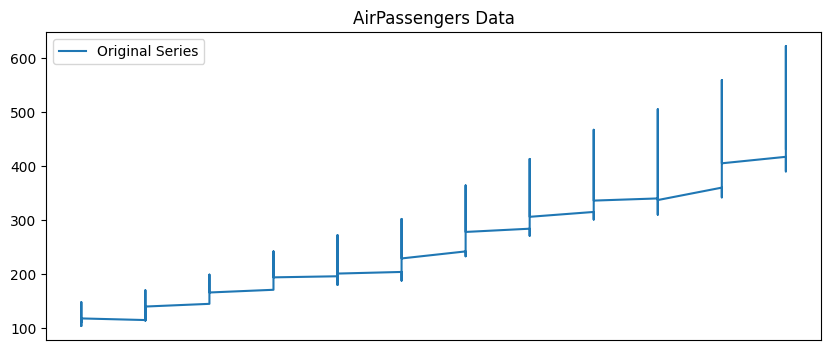

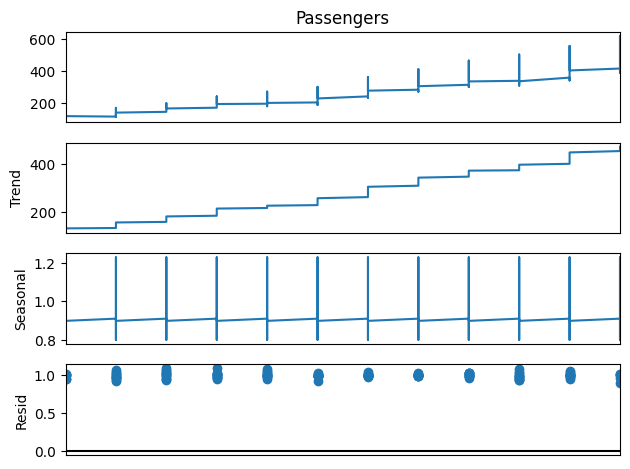

In [9]:
"""
6) Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components.

->
"""

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
data.columns = ["Month", "Passengers"]
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)

# Plot original series
plt.figure(figsize=(10, 4))
plt.plot(data, label="Original Series")
plt.title("AirPassengers Data")
plt.legend()
plt.show()

# Decomposition
decomposition = seasonal_decompose(data["Passengers"], model="multiplicative", period=12)
decomposition.plot()
plt.show()

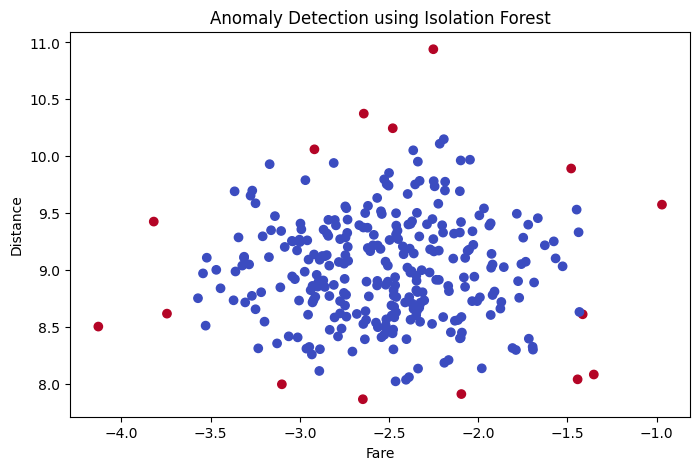

In [10]:
"""
7) Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare)
to detect anomalies and visualize them on a 2D scatter plot.

->
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Sample dataset simulating Taxi Fare data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)
X = pd.DataFrame(X, columns=["Fare", "Distance"])

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso.fit_predict(X)
X["Anomaly"] = y_pred

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X["Fare"], X["Distance"], c=(X["Anomaly"] == -1), cmap="coolwarm")
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Fare")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


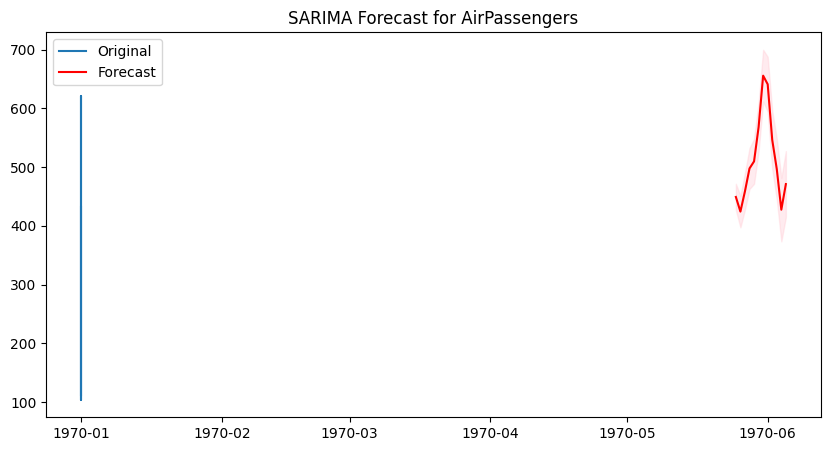

In [11]:
"""
8) Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

->
"""

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# Load dataset
data = get_rdataset("AirPassengers").data
data.columns = ["Month", "Passengers"]
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)

# Train SARIMA model
model = SARIMAX(data["Passengers"], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Forecast next 12 months
forecast = result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Visualization
plt.figure(figsize=(10,5))
plt.plot(data["Passengers"], label="Original")
plt.plot(forecast.predicted_mean, label="Forecast", color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast for AirPassengers")
plt.legend()
plt.show()

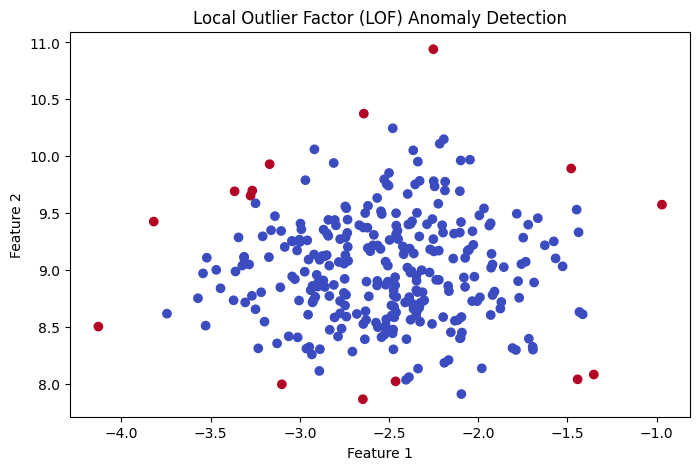

In [12]:
"""
9) Apply Local Outlier Factor (LOF) on any numerical dataset
to detect anomalies and visualize them using matplotlib.

->
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=(y_pred == -1), cmap="coolwarm")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
"""
10) You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and detect abnormal spikes or drops in real-time consumption data collected every 15 minutes.

->

Real-Time Workflow:

Anomaly Detection: Use Isolation Forest or LOF to detect abnormal spikes in consumption data streams.

Forecasting Model: Use SARIMAX to forecast short-term energy demand, considering exogenous variables like weather and region.

Validation & Monitoring:

Use rolling forecasts and compare predicted vs actual demand.

Monitor error metrics (RMSE, MAPE) in real time.

Retrain model periodically using new data.

Business Impact:

Early anomaly detection prevents power failures.

Accurate forecasts optimize energy distribution and cost efficiency.
"""

# Real-time forecasting and anomaly detection for power grid data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simulate streaming power consumption data
np.random.seed(42)
time_index = pd.date_range(start='2025-01-01', periods=500, freq='15min')
energy_usage = 200 + np.sin(np.linspace(0, 50, 500))*20 + np.random.normal(0, 5, 500)
data = pd.DataFrame({'timestamp': time_index, 'energy_usage': energy_usage})
data.set_index('timestamp', inplace=True)

# Anomaly Detection
iso = IsolationForest(contamination=0.03, random_state=42)
data["anomaly"] = iso.fit_predict(data[["energy_usage"]])

# SARIMAX Forecasting
model = SARIMAX(data["energy_usage"], order=(1,1,1), seasonal_order=(1,1,1,96))
result = model.fit(disp=False)
forecast = result.get_forecast(steps=96)
forecast_ci = forecast.conf_int()

# Visualization
plt.figure(figsize=(10,5))
plt.plot(data.index, data["energy_usage"], label="Actual")
plt.scatter(data.index[data["anomaly"] == -1], data["energy_usage"][data["anomaly"] == -1], color='red', label="Anomalies")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='green', label="Forecast (Next 24h)")
plt.title("Power Consumption: Forecasting & Anomaly Detection")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
